# EDA-Project 2

Это ваш второй проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"houses_to_rent.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("houses_to_rent.csv")
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [3]:
data.tail()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6079,6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


In [4]:
rents = data.copy()

In [5]:
rents.drop("Unnamed: 0", axis = 1, inplace = True)
rents.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [6]:
rents["floor"].value_counts()

-     1555
1      573
3      401
2      379
4      319
5      314
6      306
8      291
7      287
9      224
10     213
11     193
12     179
13     143
14     141
15     107
16      89
17      73
18      69
19      47
20      36
21      30
23      26
25      23
22      21
24      11
27       7
26       6
28       6
29       4
31       1
99       1
51       1
32       1
85       1
35       1
68       1
Name: floor, dtype: int64

Floor означает этаж. Так как значений "-" целых 1555, а это большой пласт всех данных в этом столбце, то важно не удалять эти данные. Пока интерпретировать "-" я никак не могу, но так как обработать эти данные важно, то можно заменить все значения на среднее.
Также, по примеру колонки city можем заменить строковые значения на числовые в столбцах animal и furniture.

In [7]:
rents["floor"] = rents["floor"].replace('-',np.nan)
rents["floor"]= rents["floor"].fillna(rents["floor"].median()).astype('int')


rents.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,6,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,6,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [8]:
rents["animal"].value_counts()

acept        4666
not acept    1414
Name: animal, dtype: int64

In [9]:
rents["furniture"].value_counts()

not furnished    4498
furnished        1582
Name: furniture, dtype: int64

In [10]:
rents["animal"].replace("acept", 1, inplace = True)
rents["animal"].replace("not acept", 0, inplace = True)
rents["furniture"].replace("furnished", 1, inplace = True)
rents["furniture"].replace("not furnished", 0, inplace = True)
rents.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,6,1,1,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,1,0,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,1,1,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,1,0,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,6,0,0,R$0,"R$1,200",R$41,R$16,"R$1,257"


В столбцах с деньгами можно опустить символы "R" и "$".

In [11]:
for col in ["hoa","rent amount","property tax","fire insurance","total"]:
    
    rents[col] = rents[col].apply(lambda x: x.replace("R$", ""))
    rents[col] = rents[col].apply(lambda x: x.replace(",", ""))
rents.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,6,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,6,0,0,0,1200,41,16,1257


In [12]:
rents.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,1,160,3,2,2,6,0,0,0,3500,250,53,3803
6079,1,60,2,1,1,4,1,1,489,1900,0,25,2414


In [13]:
rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int32
animal            6080 non-null int64
furniture         6080 non-null int64
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int32(1), int64(7), object(5)
memory usage: 593.9+ KB


In [14]:
rents.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,7.206743,0.767434,0.260197
std,0.343535,375.559485,1.129665,1.438860,1.611909,5.243834,0.422502,0.438778
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,6.000000,1.000000,0.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,9.000000,1.000000,1.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000


Все значения в дэйтасете являются численными, но в некоторых столбцах оформленные как строки.
Поэтому, для упрощения дальнейшей обработки, преобразуем все значения в integers.

In [15]:
rents = rents.apply(pd.to_numeric, errors = "ignore")
rents.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,7.206743,0.767434,0.260197,4395.844408,58.204276,6033.194572
std,0.343535,375.559485,1.129665,1.438860,1.611909,5.243834,0.422502,0.438778,3576.668946,49.313441,8751.347700
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,420.000000,3.000000,660.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1800.000000,23.000000,2451.500000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,6.000000,1.000000,0.000000,3111.000000,41.000000,4128.500000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,9.000000,1.000000,1.000000,5952.500000,77.000000,8074.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,45000.000000,677.000000,372700.000000


Не все столбцы преобразовались, поэтому нужна дополнительная чистка.

In [16]:
rents["hoa"].value_counts()

0           1291
Sem info     119
Incluso       83
1000          82
1200          71
            ... 
1885           1
2066           1
428            1
1112           1
2185           1
Name: hoa, Length: 1292, dtype: int64

Узнал на страничке в каггле, что Incluso подразумевает, что hoa уже включен в ренту, а sem info, что информации нет.
То есть вместо hoa можем использовать 0, а вместо sem info - mean.

In [17]:
rents["hoa"].replace("Incluso", 0, inplace = True)
rents["property tax"].replace("Incluso", 0, inplace = True)

rents["hoa"] = rents["hoa"].replace('Sem info',np.nan)
rents["hoa"]= rents["hoa"].fillna(rents["hoa"].median()).astype('int')

rents["property tax"] = rents["property tax"].replace('Sem info',np.nan)
rents["property tax"]= rents["property tax"].fillna(rents["property tax"].median()).astype('int')

rents["hoa"].value_counts()


0       1374
670      133
1000      82
1200      71
1500      70
        ... 
2675       1
622        1
614        1
2655       1
4180       1
Name: hoa, Length: 1290, dtype: int64

In [18]:
rents.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,7.206743,0.767434,0.260197,1101.539967,4395.844408,490.333388,58.204276,6033.194572
std,0.343535,375.559485,1.129665,1.438860,1.611909,5.243834,0.422502,0.438778,3978.853254,3576.668946,6212.564538,49.313441,8751.347700
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,200.000000,1800.000000,33.000000,23.000000,2451.500000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,6.000000,1.000000,0.000000,670.000000,3111.000000,145.000000,41.000000,4128.500000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,9.000000,1.000000,1.000000,1436.000000,5952.500000,458.000000,77.000000,8074.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


Данные готовы к обработке

Начнем с того, какие признаки влияют на итоговую цену.

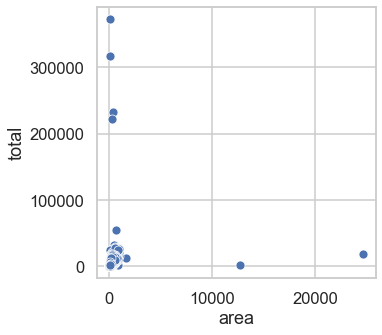

In [36]:
plt.figure(figsize=(5,5))
sns.set(style = "whitegrid")
sns.set_context("talk")
sns.scatterplot(x="area", y="total", data=rents);

Заметно, что основная часть значений площадей меньше 2500 (а то и меньше), поэтому сократим границы оси ОХ, а впоследствии и ОУ.

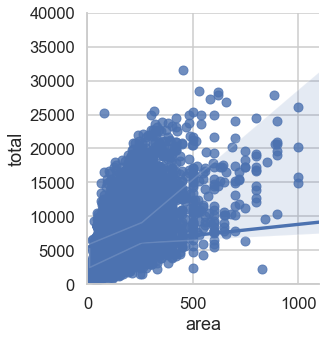

In [140]:
sns.lmplot(x="area", y="total", data=rents);
plt.xlim(0, 1100)
plt.ylim(0, 40000);

Тенденция нелинейна, но есть. То есть мы можем сказать, что с повышением площади жилья, цена на нее растет.

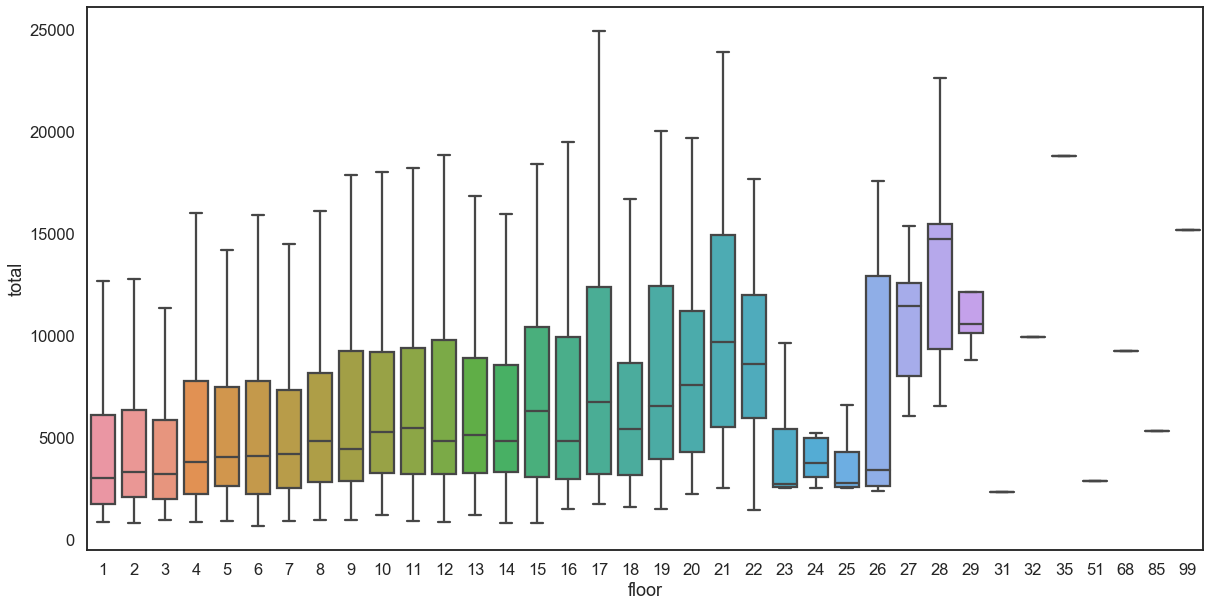

In [80]:
plt.figure(figsize=(20,10))
sns.set(style = "white")
sns.set_context("talk")
sns.boxplot(x="floor", y="total", data=rents, showfliers = False);

До 21-ого этажа сохраняется тенденция к росту и корреляции с ценой. Далее, не совсем объяснимые плоты. Я думаю, это связано с меньшим количеством данных, а также к тому, что, возможно, 22-25 этажи могут быть последними этажами для определенных домов. Насколько я знаю, последние этажи подразумевают проблемы с крышей. Также, возможно, что в перемешались данные разных городов, ведь для сейсмоопасных зон 26-30 этажи будут предельно допустимыми и последними, тогда как в менее опасных зонах это будут вполне престижные высокие этажи с видом на город. Поэтому такое длинное тело для 26, ну и в целом непонятное поведение для 26-30.
Начиная с 31 записей в dataset'е мало или они одинаковые, поэтому отображается лишь медиана.

Рассмотрим остальные однотипные признаки вместе.

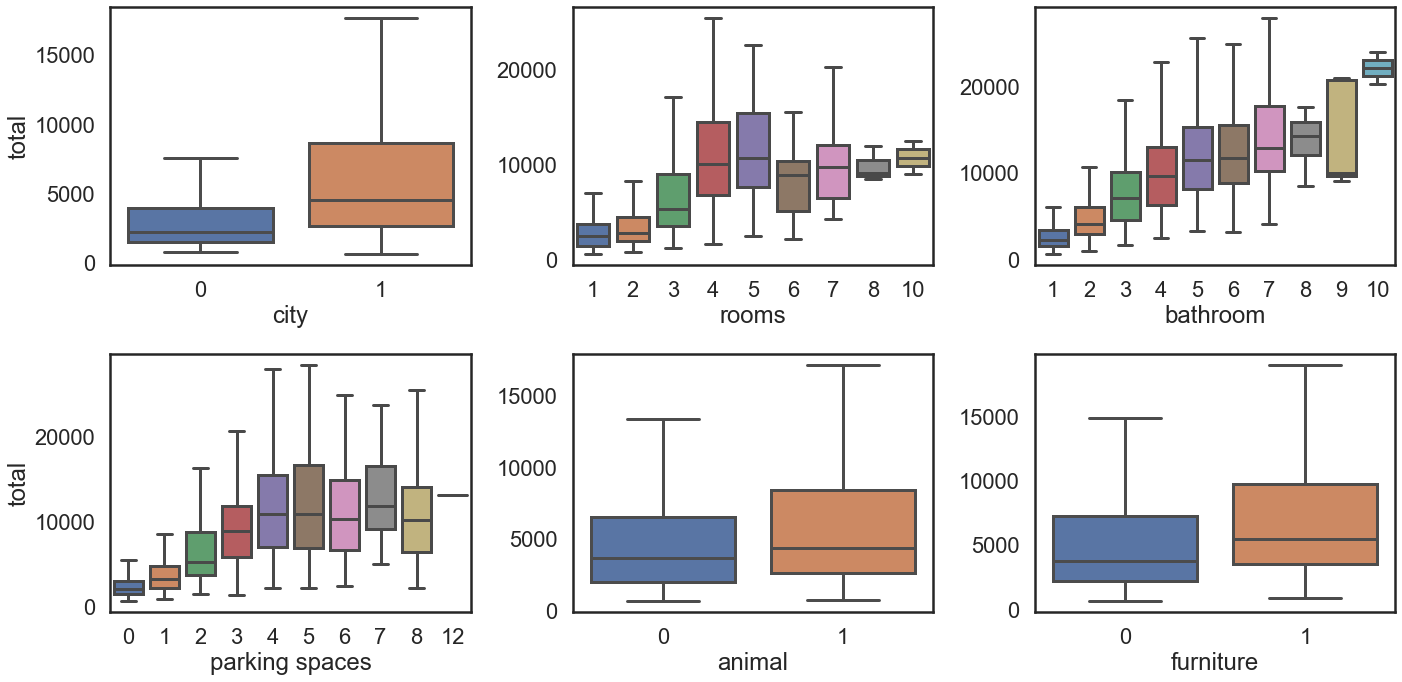

In [74]:
fig = plt.figure(figsize = (20,10))

sns.set(style = "white")
sns.set_context("poster")

ax1 = fig.add_subplot(2,3,1)
sns.boxplot(x="city", y="total", data=rents, showfliers = False)
plt.tight_layout();

ax2 = fig.add_subplot(2,3,2)
sns.boxplot(x="rooms", y="total", data=rents, showfliers = False)
ax2.set_ylabel('')
plt.tight_layout();

ax3 = fig.add_subplot(2,3,3)
sns.boxplot(x="bathroom", y="total", data=rents, showfliers = False)
ax3.set_ylabel('')
plt.tight_layout();

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(x="parking spaces", y="total", data=rents, showfliers = False)
plt.tight_layout();

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(x="animal", y="total", data=rents, showfliers = False)
ax5.set_ylabel('')
plt.tight_layout();

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(x="furniture", y="total", data=rents, showfliers = False)
ax6.set_ylabel('')
plt.tight_layout();

1. "City": Boxplot выше показывает, что признак city сильно влияет на цену. Причем в city = 0 значения находятся в узком промежутке, а медиане соответствует значение чуть меньше 2500, тогда как для 1 верхняя шпилька протягивается аж до 17500, но медиана соответствует значению около 4800.
2. "Rooms": Удивительно, что цена на дома с 4-7 комнатами больше, чем для остальных вариантов.
3. "Bathroom": Не считая 9 санузлов, для всех остальных значений прослеживается тенденция к росту цены. Очень интересным выглядит вариант с 10-ю санузлами, который в среднем намного дороже остальных вариантов (в 1.5-2 раза).
4. "Parking spaces": Заметен рост цены с повышением парковочных мест до 4, далее медиана не меняется и остается в зуком коридоре. При 12 парковочных мест boxplot представляет собой лишь медиану, что говорит о том, что все значения одинаковы, если их много или оно вовсе единственно.
5. "Animal": Сильно цена от отсутствия/наличия домашних животных не меняется, но очевидно больше для наличия, хоть и не намного.
6. "Furniture": Удивительно, что наличие мебели не очень сильно влияет на цену. Логично, что меблированное жилье дороже, однако не настолько, как могло бы показаться.

Портрет среднего дорого жилья таков: в городе, 4-5 комнат, больше 5 санузлов, больше 4-х парковочных мест, с позволением иметь питомцев и меблирована, этаж выше 17.

Осталось рассмотреть составные части стоимости аренды. Взглянем на их корреляцию с итоговой ценой.

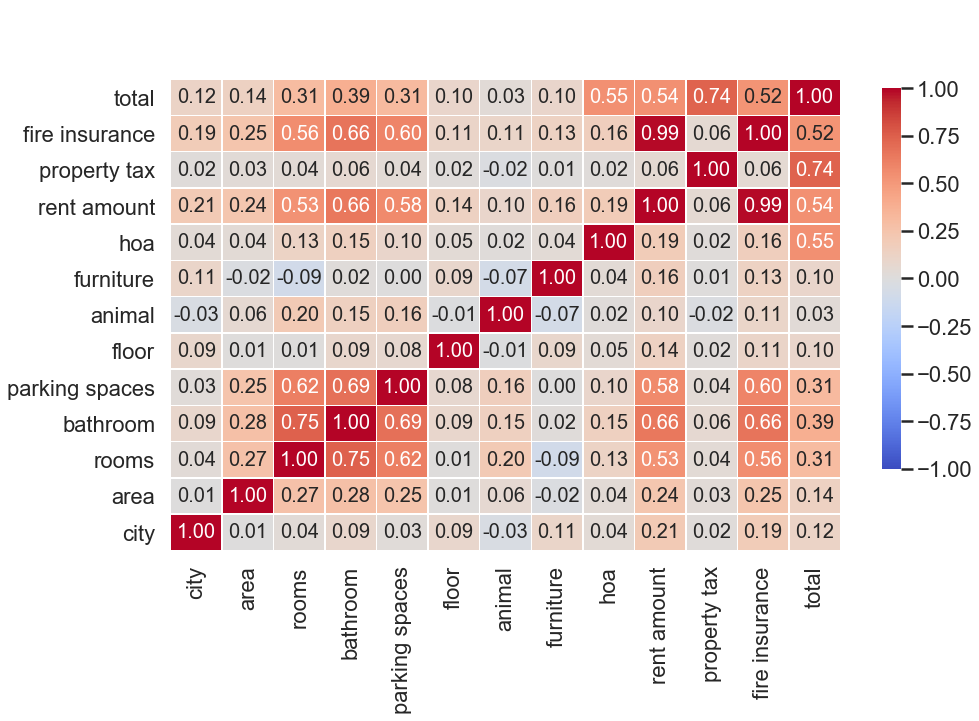

In [144]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(style = "white")
sns.set_context("poster")
sns.heatmap(rents.corr(), 
            center=0, 
            vmin=-1, 
#            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": 0.7}, 
            annot=True, annot_kws={"size": 20},
            fmt='.2f', cmap="coolwarm").set_ylim(0,15);

Приведенная выше тепловая карта показывает, что наиболее сильно итоговая цена коррелирует с налогом на имущество (0,74), несмотря на то, что большую часть стоимости составляет сама арендная плата. К слову, арендная плата, вместе с hoa и пожарной защитой, имеют прямую корреляцию (0,55;0,54;0,52) с итоговой ценой.
По неценовым признакам, можно заметить, что город, площадь, этаж, приятие/неприятие питомца, мебель практически никак не коррелируют с итоговой ценой.
В большей степени влияет количество санузлов (0,39), количество комнат (0,31) и парковочных мест (0,31).
Стоит отметить, как эти же признаки коррелируют с пожарной безопасностью и арендной платой (0,66;0,56 и 0,6) и (0,66;0,53 и 0,58), соответственно.